# 1. Quiz(burn_out_train.csv)
* 모든 사람이 팬데믹(세계적 대유행) 상황으로 고통받고 있는 요즘, 정신 건강을 유지하기가 정말 어려워지고 있다.
* 익명의 설문 조사에 따르면 전 세계적으로 약 4억 5천만 명의 사람들이 건강 악화와 장애의 주요 원인 중 하나가 될 수 있는 정신 장애를 안고 살고 있다.
* 현재의 전염병 상황을 기반으로 회사에서 일하는 직원들의 능률이 떨어지는 이유가 무엇인지 알아보자
* 제공된 다양한 조건에 따라 직원의 능률에 어떤 영향을 받는지 알아보자
* 1. 어떤 경우에 Burn Rate과 연관이 있는지 확인하고 최적의 모델을 찾으시오.
    - 결측치, 문자열, 이상치, 중복값, 시계열, 스케일러, 하이퍼파라미터, 변수 선택

# 2. 컬럼
* Employee ID : 사원별로 부여된 고유 ID (ex. fffe390032003000)
* Date of Joining : 직원이 조직에 합류한 날짜(시간) (ex. 2008-12-30)
* Gender : 사원의 성별(남-Male:1, 여-Female:0)
* Company Type : 직원이 근무하는 회사의 유형(서비스-Service:1/ 제품-Product:0)
* WFH Setup Available : 직원이 재택근무 시설을 이용할 수 있습니까 (Yes:1, No:0)
* Designation : 회사에서 일하는 직원의 직책. [0.0, 5.0] 범위에서 클수록 높은 직책
* Resource Allocation : 작업을 위해 직원에게 할당된 자원의 양. 즉, 근무 시간 수. [1.0, 10.0] 범위에서 높을 수록 더 많은 리소스를 의미
* Mental Fatigue Score : 직원이 겪고 있는 정신적 피로 정도. [0.0, 10.0]범위에서 0.0:피로없음, 10.0:완전 피로함을 의미
* Burn Rate : 근무 중 Burn out의 비율을 말하는 각 직원에 대해 예측해야 하는 값. [0.0, 1.0]범위에서 값이 높을수록 번아웃을 의미

# 3. 데이터 전처리

In [2]:
import pandas as pd
df = pd.read_csv('../data_set/6.회귀/burn_out_train.csv')
print(df.shape)
df.head()

(22750, 9)


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


## 3.1 결측치

In [ ]:
# 결측치 확인

In [3]:
df.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
# 결측치 삭제 

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

## 3.2 문자열 처리

In [ ]:
# 문자열 확인

In [6]:
df.dtypes

Employee ID              object
Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

In [7]:
df.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [ ]:
# 문자열 데이터 확인

In [8]:
li = ['Date of Joining', 'Gender', 'Company Type', 'WFH Setup Available']
for i in li:
    print(i, "=>", df[i].unique())

Date of Joining => ['2008-09-30' '2008-11-30' '2008-11-03' '2008-07-24' '2008-11-26'
 '2008-01-02' '2008-10-31' '2008-03-16' '2008-05-12' '2008-05-14'
 '2008-02-03' '2008-03-17' '2008-03-28' '2008-05-29' '2008-08-31'
 '2008-01-15' '2008-05-04' '2008-10-11' '2008-09-18' '2008-09-16'
 '2008-12-16' '2008-03-10' '2008-05-03' '2008-08-04' '2008-07-31'
 '2008-06-17' '2008-04-28' '2008-10-30' '2008-06-22' '2008-02-18'
 '2008-06-24' '2008-12-08' '2008-04-11' '2008-08-28' '2008-03-21'
 '2008-07-22' '2008-01-23' '2008-10-09' '2008-09-10' '2008-05-26'
 '2008-12-22' '2008-04-08' '2008-02-25' '2008-01-08' '2008-11-20'
 '2008-09-11' '2008-06-11' '2008-02-28' '2008-08-20' '2008-10-18'
 '2008-08-14' '2008-07-17' '2008-07-05' '2008-02-04' '2008-08-01'
 '2008-05-21' '2008-10-21' '2008-03-19' '2008-09-27' '2008-03-12'
 '2008-05-20' '2008-09-17' '2008-02-13' '2008-09-19' '2008-07-03'
 '2008-10-27' '2008-04-15' '2008-10-26' '2008-01-31' '2008-01-03'
 '2008-03-13' '2008-03-27' '2008-11-15' '2008-08-17' '200

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender_num'] = le.fit_transform(df['Gender'])
df['Company_Type_num'] = le.fit_transform(df['Company Type'])
df['WFH_S_Available_num'] = le.fit_transform(df['WFH Setup Available'])
print(df.dtypes)
df

Employee ID              object
Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
Gender_num                int32
Company_Type_num          int32
WFH_S_Available_num       int32
dtype: object


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Gender_num,Company_Type_num,WFH_S_Available_num
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16,0,1,0
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36,1,1,1
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20,1,1,1
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52,0,1,0
5,fffe3300350037003500,2008-11-26,Male,Product,Yes,2.0,4.0,3.6,0.29,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
22743,fffe3300390030003600,2008-12-15,Female,Product,Yes,1.0,3.0,6.0,0.48,0,0,1
22744,fffe32003500370033003200,2008-05-27,Male,Product,No,3.0,7.0,6.2,0.54,1,0,0
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59,0,0,1
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52,0,1,0


In [10]:
df.describe()
# 이전 글에서 각각의 범위가 나왔었다. 이상치 확인결과 그 범위 안의 값들이라 이상치는 없다. 

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Gender_num,Company_Type_num,WFH_S_Available_num
count,18590.000000,18590.000000,18590.000000,18590.000000,18590.000000,18590.000000,18590.000000
mean,2.179398,4.486552,5.732173,0.452444,0.475686,0.654868,0.539537
std,1.133148,2.044848,1.920547,0.197848,0.499422,0.475424,0.498448
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.320000,0.000000,0.000000,0.000000
50%,2.000000,4.000000,5.900000,0.450000,0.000000,1.000000,1.000000
75%,3.000000,6.000000,7.100000,0.590000,1.000000,1.000000,1.000000
max,5.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000


## 3.3 중복값

In [11]:
df.duplicated().sum()

0

## 3.4 시계열

In [12]:
df['new_date'] = pd.to_datetime(df['Date of Joining'])

In [13]:
df['year'] = df['new_date'].dt.year
df['month'] = df['new_date'].dt.month
df['day'] = df['new_date'].dt.day
df.head().T

,0,1,3,4,5
Employee ID,fffe32003000360033003200,fffe3700360033003500,fffe32003400380032003900,fffe31003900340031003600,fffe3300350037003500
Date of Joining,2008-09-30,2008-11-30,2008-11-03,2008-07-24,2008-11-26
Gender,Female,Male,Male,Female,Male
Company Type,Service,Service,Service,Service,Product
WFH Setup Available,No,Yes,Yes,No,Yes
Designation,2.0,1.0,1.0,3.0,2.0
Resource Allocation,3.0,2.0,1.0,7.0,4.0
Mental Fatigue Score,3.8,5.0,2.6,6.9,3.6
Burn Rate,0.16,0.36,0.2,0.52,0.29
Gender_num,0,1,1,0,1


# 4. 탐색적 데이터 분석(ERD)
## 4.1 상관계수 

<Axes: >

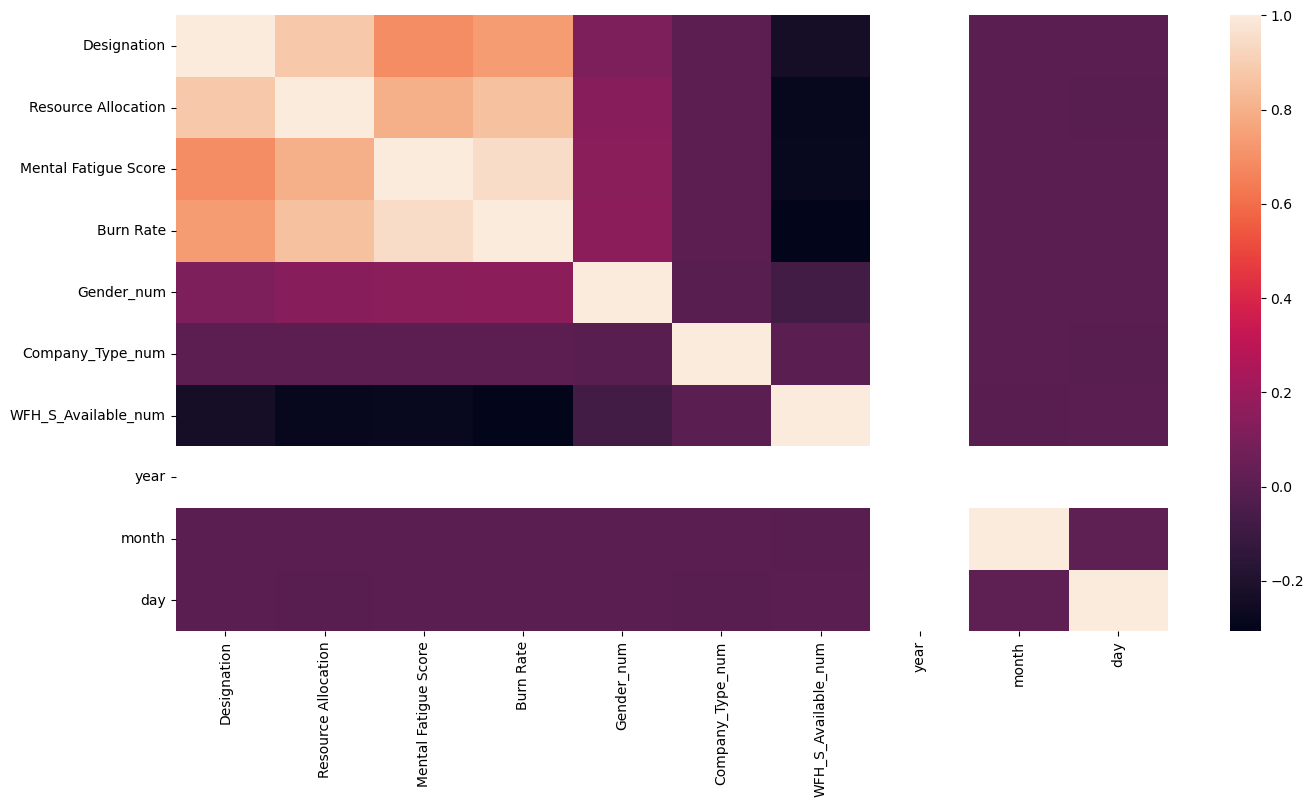

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax1 = plt.subplots()
fig.set_size_inches(16, 8)
sns.heatmap(df.corr(numeric_only=True), ax=ax1)

In [16]:
df['year'].unique()
# 년도는 2008년 하나밖에 없어 탐색적 데이터 분석에서는 해당 데이터를 제외할 것이다. 

array([2008])

In [ ]:
# 월별 남/녀 burn rate(근무 중 번아웃의 비율) 확인

<Axes: xlabel='month', ylabel='Burn Rate'>

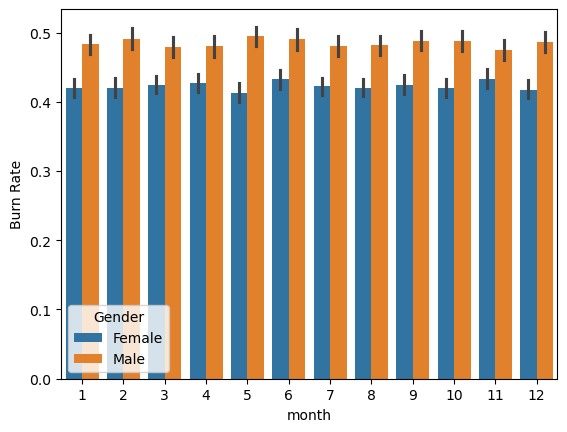

In [17]:
sns.barplot(data=df, x='month', y='Burn Rate', hue='Gender')

* 특정 월에 더 스트레스를 받거나 하는 큰 차이는 없다. 
* 그 대신 여성보다 남성이 더 스트레스를 많이 받는다는 것을 알 수 있다. 
* 그렇다고 하는 건 직급 또는 일하는 양이 여성보다 남성이 더 많을 가능성이 있다. 
* 혹은 남성의 멘달이 많이 약할 수 있다고 볼 수 있다. 
* 위의 결과에서 남성과 여성의 직급 또는 일하는 시간이 많을 수 있다고 짐작했으니 확인해보도록 하자.
* Designation : 회사에서 일하는 직원의 직책. 0.0~5.0 범위에서 클수록 높은 직책

<Axes: xlabel='month', ylabel='Designation'>

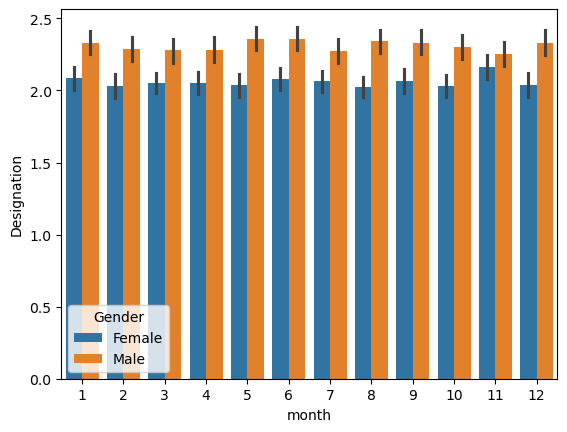

In [18]:
sns.barplot(data=df, x='month', y='Designation', hue='Gender')

* 확인 결과 여성보다 남성의 직급이 높다는 것을 알 수 있다.
* 그럼 직책별 일하는 시간을 확인해보도록 하자.
* Resource Allocation : 작업을 위해 직원에게 할당된 자원의 양. 즉, 근무 시간 수. 1.0~10.0 범위에서 높을수록 더 많은 양을 의미 

<Axes: xlabel='Designation', ylabel='Resource Allocation'>

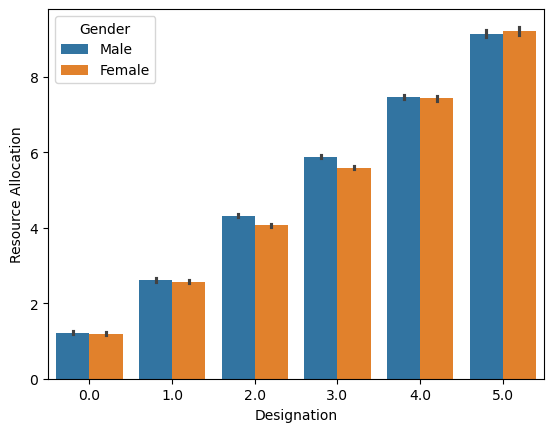

In [19]:
sns.barplot(data=df, x='Designation', y='Resource Allocation', hue='Gender')

* 단순히 위의 내용을 봤을 땐 남성이 직책이 높아 일을 많이 해서 번아웃이 큰가 했는데 그렇지 않다는 것을 알 수 있다.
* 직책이 높은 경우 여성이 남성보다 일을 더 많이 한다는 것을 알 수 있다.
* 지금 상황으로만 봤을 땐 여성보다 남성의 멘탈이 약하지 않을까 생각이 든다. 

<Axes: xlabel='Resource Allocation', ylabel='Designation'>

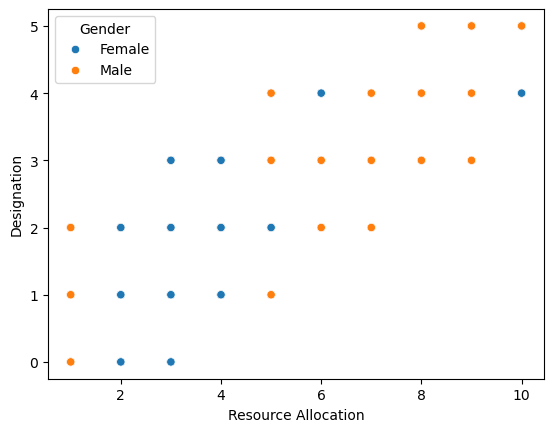

In [20]:
sns.scatterplot(data=df, x='Resource Allocation', y='Designation', hue='Gender')

* 우 상향을 한다는 것은 두 개가 상관관계가 높다고 볼 수 있다.
* 즉, 직책이 높을수록 일하는 시간이 더 많아 스트레스를 더 많이 받는다는 것을 알 수 있다.
  

In [ ]:
# 근무시간에 따른 번아웃

In [ ]:
# 직책이 높을수록 일을 많이 하나??

In [ ]:
# 직업별 차이가 있는가?
# Company Type : 직원이 근무하는 회사의 유형 (서비스-Service:1, 제품-Product:0)

# 5. 모델링
## 5.1 train, test 셋 분리

## 5.2 KNN 모델

### 5.2.1 스케일링

### 5.2.2 GridSearchCV

## 5.3 SVR 모델

### 5.3.1 선형모델

### 5.3.2 비선형모델

### 5.3.3 스케일링(StandardScaler)

### 5.3.4 선형모델 스케일 적용

### 5.3.5 비선형 모델 스케일 적용

### 5.3.6 GridSearchCV(선형모델)

### 5.3.7 GridSearchCV(비선형모델)

## 5.4 RandomForest

### 5.4.1 GridSearchCV

## 5.5 GBM

### 5.5.1 GridSearchCV

# 6. REF 변수 중요도

# 7. 임베드(embed) 변수 중요도 